<a href="https://colab.research.google.com/github/sagarrokad1/LGMVIP-DataScience/blob/main/TASK-9%20Advance%20Level/1_DataExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

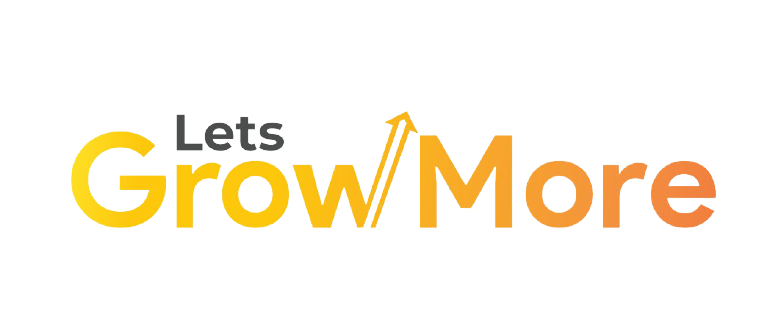


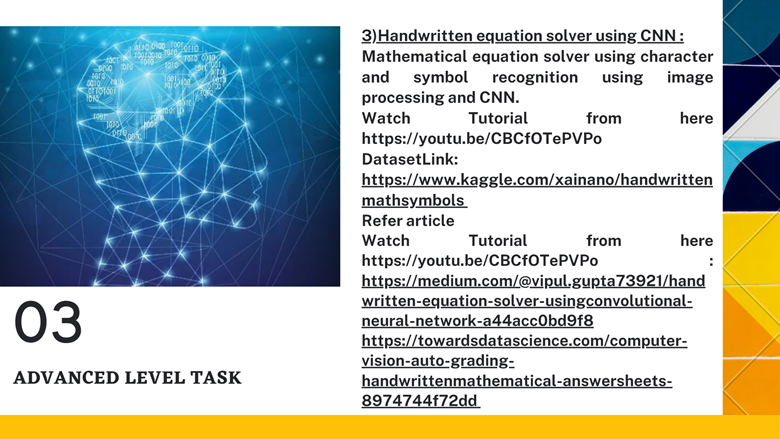

###**Problem Statement:**
Mathematical equation solver using character and symbol recognition using image processing and Convolutional Neural Networks(CNN).

The main objective of this project to develop a project which identifies the numbers, symbols and characters present in a Handwritten Wquation and solves the equation, and in the end gives the soluton to the equation.

##**BY : Sagar Rokad**

# Data extraction

The dataset is not balanced and for some classes it has less than 1K images, while for some it has 20K+ images. For simplicity, we take upto 4K images per class.

Tasks
- Fetch upto 4000 images if number of images > 4000 per class.
- Then, resize each image into 28x28 and then convert it into 784 vector
- Then, prepare the dataframe with all the image vectors and add label to each vector
- Then, save the dataframe to a CSV file.

## Import required libraries

In [ ]:
# Import libraries
import os
import random

from tqdm.notebook import tqdm

## Mount Google drive (only when in colab)

In [ ]:
# Mount Google drive in the notebook
# from google.colab import drive
# drive.mount('/gdrive')

## Specify the folder paths

_Note: Uncomment "base_folder" in case of gdrive_

In [ ]:
# base_folder = '/gdrive/My Drive/Projects/Handwritten-Math-Equation-Solver'
base_folder = 'data'
input_folder = os.path.join(base_folder, 'input_images')

## Task 1. Fetch upto 4000 images if number of images > 4000 per class

In [ ]:
# Check no. of images in each class
items_count_dict = {}
for folder in tqdm(os.listdir(input_folder)):
  folder_path = os.path.join(input_folder, folder)
  # If folder_path is not actual folder, then continue
  if not os.path.isdir(folder_path):
    continue
  # Fetch items (or filenames) from the folder_path
  items = os.listdir(folder_path)
  # Add the filenames length against the folder into the dictionary
  items_count_dict[folder] = len(items)

# Sort items in the dictionary according to counts
sorted_items = sorted(items_count_dict.items(), key=lambda x:x[1])
items_count_dict_sorted = dict(sorted_items)
print(items_count_dict_sorted.items())

  0%|          | 0/16 [00:00<?, ?it/s]

dict_items([('div', 868), ('7', 2909), ('8', 3068), ('6', 3118), ('times', 3251), ('5', 3545), ('9', 3737), ('0', 4000), ('+', 4000), ('1', 4000), ('-', 4000), ('=', 4000), ('4', 4000), ('3', 4000), ('2', 4000)])


In [ ]:
# To keep the sample size limited, we take <4000 images randomly for each class.
threshold = 4000

In [ ]:
items_count_dict = {}

# Iterate over all classes folders
for folder in tqdm(os.listdir(input_folder)):
  folder_path = os.path.join(input_folder, folder)
  if not os.path.isdir(folder_path):
    continue

  # fetch filenames in the class folder
  items = os.listdir(folder_path)
  
  # vars for bookeeping
  items_orig_len = len(items)
  deleted_files_len = 0

  if len(items) > threshold:
    # Fetch random filenames upto threshold from all filenames
    random_files = random.sample(items, threshold)
    # Take difference of filenames to be deleted
    to_delete_files = set(items) - set(random_files)
    
    # vars for bookeeping
    deleted_files_len = len(to_delete_files)
    # Delete files (not selected in random sampling)
    for item in to_delete_files:
      os.remove(os.path.join(folder_path, item))

  # fetch filenames in the class folder again
  items = os.listdir(folder_path)
  # Print resultant metric for the class folder
  print(f'{folder:<6} {items_orig_len:>5} {deleted_files_len:>4} {len(items):>4}')

  # Add items len in the dict
  items_count_dict[folder] = len(items)

  0%|          | 0/16 [00:00<?, ?it/s]

div      868    0  868
times   3251    0 3251
9       3737    0 3737
0       4000    0 4000
7       2909    0 2909
+       4000    0 4000
6       3118    0 3118
1       4000    0 4000
8       3068    0 3068
-       4000    0 4000
=       4000    0 4000
4       4000    0 4000
3       4000    0 4000
2       4000    0 4000
5       3545    0 3545


In [ ]:
# Print the dictionary with len of items in each class folder
print(items_count_dict.items())

dict_items([('div', 868), ('times', 3251), ('9', 3737), ('0', 4000), ('7', 2909), ('+', 4000), ('6', 3118), ('1', 4000), ('8', 3068), ('-', 4000), ('=', 4000), ('4', 4000), ('3', 4000), ('2', 4000), ('5', 3545)])


## Task 2. Apply image transformations and then convert to 784 vector for each image

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import os
from tqdm.notebook import tqdm

In [ ]:
def read_img_to_gray(img_filepath):
  img = cv2.imread(img_filepath)
  imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgray = ~imgray
  return imgray

In [ ]:
def resize_img(imgray, resize=(28,28)):
  '''
  Resize the image by finding contours around the math symbol and then resize it to 28x28 shape

  Arguments:
    imgray: Image in grayscale

  Returns:
    Resized image of 28x28 shape
  '''
  ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # print('Number of contours:', len(contours))
  # print(hierarchy.shape)
  cnt = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])
  w, h = resize
  max_size = 0
  for c in cnt:
    x, y, w, h = cv2.boundingRect(c)
    # print(x, y, w, h)
    max_size = max(w*h, max_size)
    if max_size == w*h:
      x_max = x
      y_max = y
      w_max = w
      h_max = h
  cropped_img = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
  resized_img = cv2.resize(cropped_img, resize)
  # print(imgray.shape)
  # print(resized_img.shape)
  # resized_img=np.reshape(resized_img,(784,1))
  return resized_img

In [ ]:
def convert_img_to_vector(img_resized, vec_size=784):
  return np.reshape(img_resized, (vec_size, 1))

In [ ]:
data = []
for folder in tqdm(os.listdir(input_folder)):
  folder_path = os.path.join(input_folder, folder)
  if not os.path.isdir(folder_path):
    continue
  
  for img in tqdm(os.listdir(folder_path)):
    imgray = read_img_to_gray(os.path.join(folder_path, img))
    img_resized = resize_img(imgray)
    img_vector = convert_img_to_vector(img_resized)
    data.append(np.append(img_vector, [folder]))

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/868 [00:00<?, ?it/s]

  0%|          | 0/3251 [00:00<?, ?it/s]

  0%|          | 0/3737 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/2909 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/3118 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/3068 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/3545 [00:00<?, ?it/s]

In [ ]:
print(len(data))

52496


## Task 3: Prepare DataFrame with label column

In [ ]:
df = pd.DataFrame(data, index=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,73,255,255,255,255,218,0,0,0,0,...,0,0,0,0,0,0,0,0,0,div
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,div
2,255,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,div
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,div
4,0,0,0,0,0,0,0,141,255,255,...,0,0,0,0,0,0,0,0,0,div


## Task 4: Save DataFrame to CSV file

In [ ]:
# Save DataFrame to CSV file
df.to_csv(os.path.join(base_folder, 'input_data.csv'), index=False)